In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('dc.csv',header=None)
data.shape

(1001, 10)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
1,30-01-2021,128437.2485,34246.28,131012.7232,34933,123106.88,32825,128333.2124,34218.54,43072
2,29-01-2021,125144.0223,33368.18,144510.0378,38531.9,119695.5162,31915.4,128459.4509,34252.2,231827
3,28-01-2021,113870.3574,30362.19,126703.4386,33783.98,111919.8118,29842.1,125131.5709,33364.86,92621
4,27-01-2021,121753.0231,32464.01,122102.8604,32557.29,109668.1467,29241.72,113885.209,30366.15,95911


In [6]:
data.columns = data.iloc[0]

In [7]:
data.head()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
1,30-01-2021,128437.2485,34246.28,131012.7232,34933,123106.88,32825,128333.2124,34218.54,43072
2,29-01-2021,125144.0223,33368.18,144510.0378,38531.9,119695.5162,31915.4,128459.4509,34252.2,231827
3,28-01-2021,113870.3574,30362.19,126703.4386,33783.98,111919.8118,29842.1,125131.5709,33364.86,92621
4,27-01-2021,121753.0231,32464.01,122102.8604,32557.29,109668.1467,29241.72,113885.209,30366.15,95911


In [8]:
data = data.iloc[1:, :]

In [9]:
pd.parse_dates = True

In [10]:
pd.index_col = 'Date'

In [11]:
data.head()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
1,30-01-2021,128437.2485,34246.28,131012.7232,34933,123106.88,32825,128333.2124,34218.54,43072
2,29-01-2021,125144.0223,33368.18,144510.0378,38531.9,119695.5162,31915.4,128459.4509,34252.2,231827
3,28-01-2021,113870.3574,30362.19,126703.4386,33783.98,111919.8118,29842.1,125131.5709,33364.86,92621
4,27-01-2021,121753.0231,32464.01,122102.8604,32557.29,109668.1467,29241.72,113885.209,30366.15,95911
5,26-01-2021,120966.1142,32254.19,123470.2188,32921.88,115652.4724,30837.37,121767.1246,32467.77,84972


In [12]:
data.describe()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,1000,1000,966,966,970,970,999,999,990
top,30-01-2021,128437.2485,34246.28,23852.544,6360,29515.648,7870,25127.68,6700,90748
freq,1,1,1,3,3,2,2,2,2,3


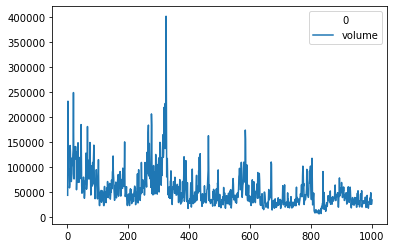

In [13]:
data['volume'] = data['volume'].astype(float)
data.plot()
plt.show()

In [14]:
data.columns.isnull().sum()

0

<AxesSubplot:xlabel='volume'>

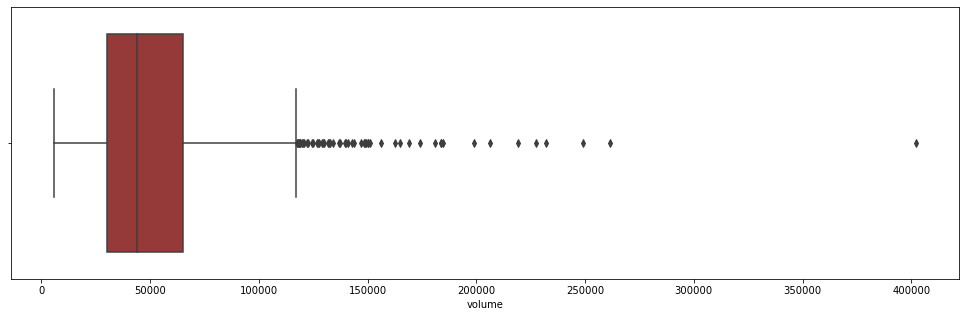

In [15]:
plt.rcParams['figure.figsize'] = (17,5)
data['volume'] = data['volume'].astype(float)
sns.boxplot(data['volume'], color = 'brown')

In [16]:
data.isnull().sum()

0
Date         0
open_SAR     0
open_USD     0
high_SAR     0
high_USD     0
low_SAR      0
low_USD      0
close_SAR    0
close_USD    0
volume       0
dtype: int64

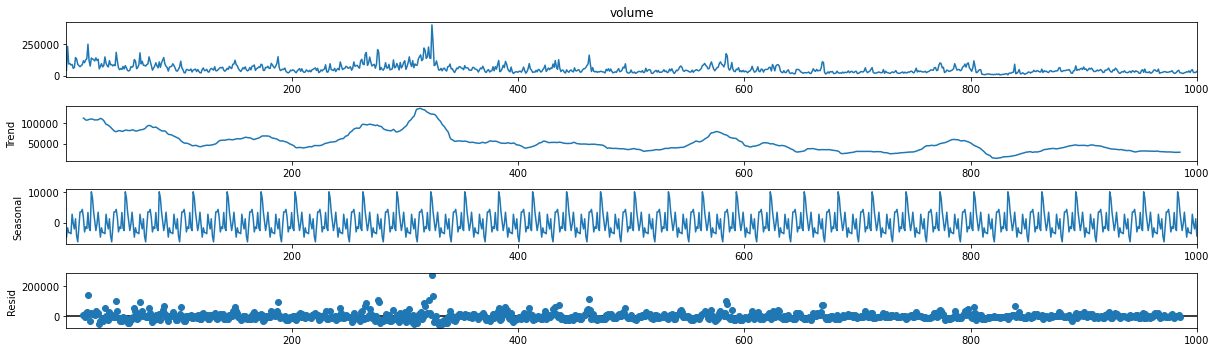

In [17]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data['volume'], model = 'additive', period = 30)
decomposition.plot()
plt.show()

<AxesSubplot:ylabel='volume'>

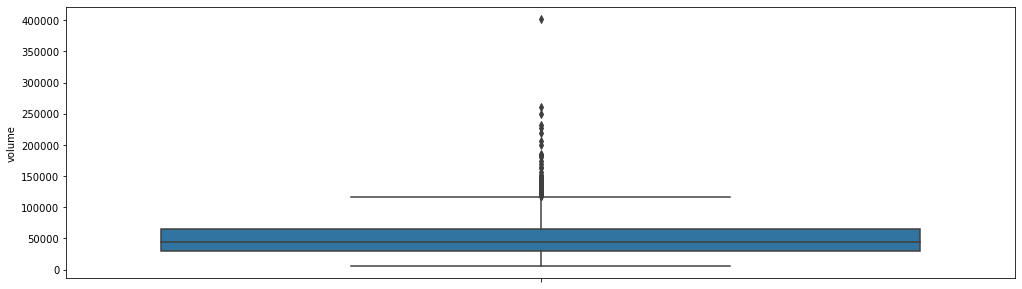

In [18]:
data = data.explode('volume')
data['volume'] = data['volume'].astype(float)
sns.boxplot(y = 'volume', data = data)

<AxesSubplot:ylabel='volume'>

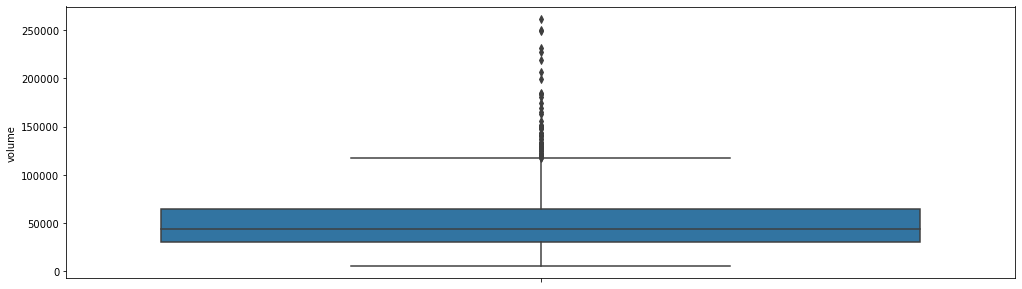

In [19]:
data.loc[data['Date'] == '13-03-2020', 'volume']= 250000

data = data.explode('volume')
data['volume'] = data['volume'].astype(float)
sns.boxplot(y = 'volume', data = data)

In [20]:
train = data.iloc[:801, :]
test = data.iloc[801:, :]

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['volume'], trend = 'additive')
model_fit = model.fit(smoothing_level = 0.004, smoothing_slope = 0.01)
model_fit.params

C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.004,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 82619.16555007694,
 'initial_trend': -72.47888653780777,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [22]:
y_holtexponential = test.copy()
y_holtexponential['holt_exp'] = model_fit.forecast(201)

C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [23]:
y_holtexponential

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume,holt_exp
802,21-11-2018,17101.48646,4559.91,17953.91488,4787.2,16553.70304,4413.85,17480.87693,4661.07,61071.0,32556.333363
803,20-11-2018,18427.21536,4913.4,18932.9193,5048.24,16224.2304,4326,17097.54854,4558.86,117380.0,32507.904127
804,19-11-2018,21234.53978,5661.94,21242.2656,5664,18208.192,4855,18414.57651,4910.03,70580.0,32459.474890
805,18-11-2018,21116.5897,5630.49,21520.43277,5738.17,21065.9968,5617,21234.7648,5662,23844.0,32411.045653
806,17-11-2018,21191.89773,5650.57,21214.51264,5656.6,20872.58867,5565.43,21108.33882,5628.29,26411.0,32362.616417
...,...,...,...,...,...,...,...,...,...,...,...
996,11-05-2018,33761.88838,9002.21,33816.60672,9016.8,31282.0864,8341,31503.36,8400,48227.0,23161.061444
997,10-05-2018,34916.224,9310,35235.45805,9395.12,33641.088,8970,33761.85088,9002.2,25055.0,23112.632207
998,09-05-2018,34421.1712,9178,35216.256,9390,33622.336,8965,34916.224,9310,25673.0,23064.202971
999,08-05-2018,35122.496,9365,35537.66528,9475.7,33980.64922,9060.54,34457.02502,9187.56,25533.0,23015.773734


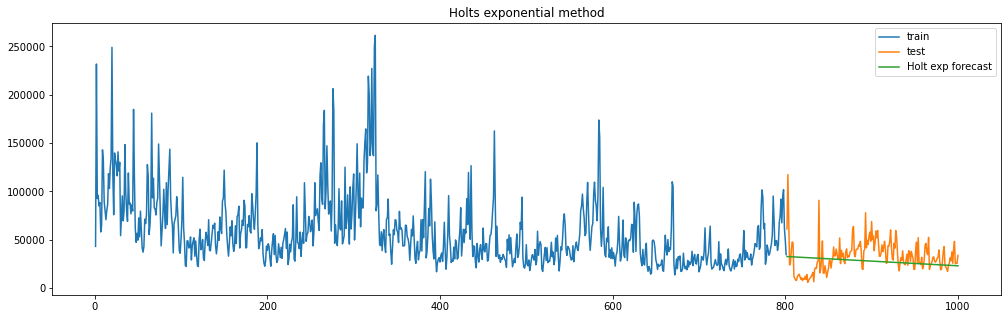

In [24]:
plt.rcParams['figure.figsize'] = (17,5)
plt.plot(train['volume'], label = 'train')
plt.plot(test['volume'], label = 'test')
plt.plot(y_holtexponential['holt_exp'], label = 'Holt exp forecast')
plt.legend()
plt.title('Holts exponential method')
plt.show()

In [25]:
mape = np.round(np.mean(np.abs(test['volume']-y_holtexponential['holt_exp'])/ test['volume'])*100, 2)

In [26]:
mape

53.19

In [27]:
from sklearn.metrics import mean_squared_error
rmse = np.round(np.sqrt(mean_squared_error(test['volume'], y_holtexponential['holt_exp'])),2)
rmse

16989.13

In [28]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['volume'], autolag = 'AIC')
print(result)

(-3.7834539904685083, 0.0030812121263033092, 21, 978, {'1%': -3.437054035425408, '5%': -2.8644997864059363, '10%': -2.5683459429326576}, 22204.217598761596)


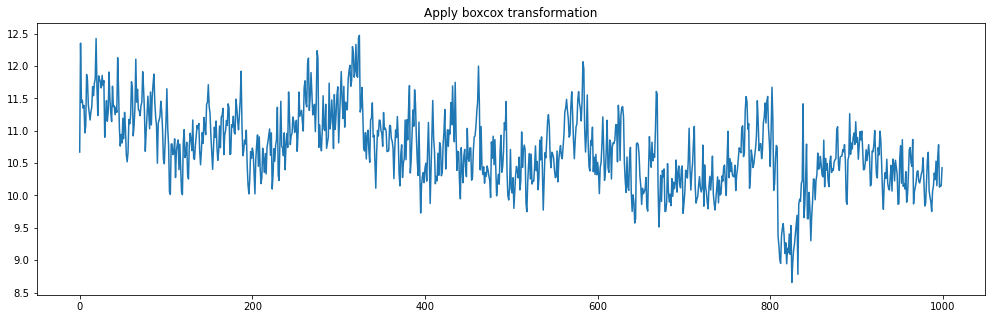

In [29]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data['volume'], lmbda = 0))
plt.plot(data_boxcox, label = 'After Boxcox transformation')
plt.legend
plt.title('Apply boxcox transformation')
plt.show()

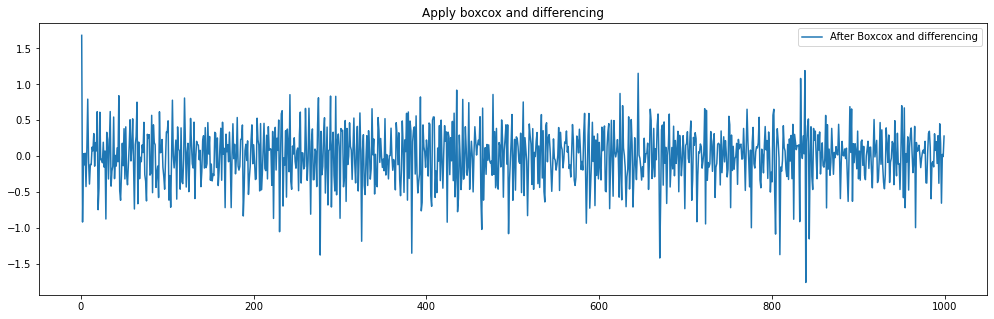

In [30]:
data_boxcox_difference = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_difference.dropna(inplace = True)
plt.plot(data_boxcox_difference, label = 'After Boxcox and differencing')
plt.legend()
plt.title('Apply boxcox and differencing')
plt.show()

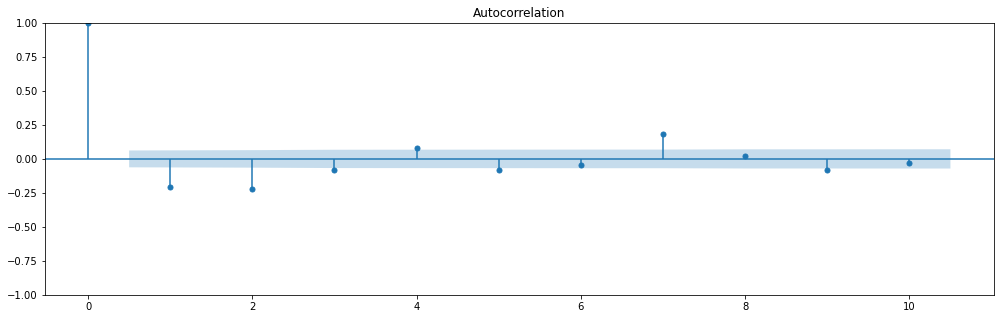

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax = plt.gca(), lags = 10)
plt.show()

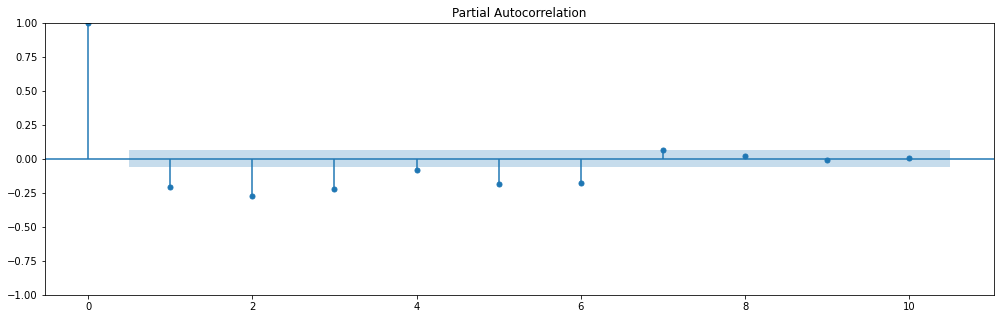

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_boxcox_difference, ax = plt.gca(), lags = 10)
plt.show()

In [33]:
length_train = 801
train_bx_d = data_boxcox_difference.head(801)

In [34]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_bx_d, order = (3, 2, 4))
model_fit = model.fit()
print(model_fit.params)

C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ar.L1    -1.198707
ar.L2    -1.198158
ar.L3    -0.209555
ma.L1    -0.984227
ma.L2    -0.022172
ma.L3    -0.982946
ma.L4     0.991747
sigma2    0.143647
dtype: float64


C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
y_arima_new = data_boxcox_difference.copy()
y_arima_new['arima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox_difference'].cumsum()
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox'].add(data_boxcox[0])
y_arima_new['arima_forecast'] = np.exp(y_arima_new['arima_forecast_boxcox'])

C:\Users\macha\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


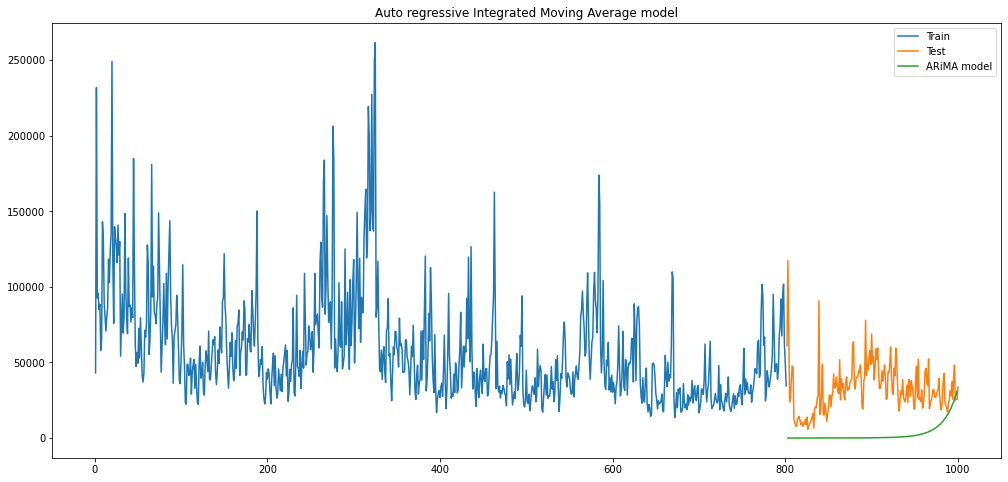

In [37]:
plt.figure(figsize=(17,8))

plt.plot(train['volume'], label = 'Train')
plt.plot(test['volume'], label = 'Test')
plt.plot(y_arima_new['arima_forecast'][test.index.min():], label = 'ARiMA model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average model')
plt.show()

In [38]:
mape = np.round(np.mean(np.abs(test['volume']-y_arima_new['arima_forecast'])/ test['volume'])*100, 2)
mape

90.87

In [ ]:
#M.vinay krishna